# Isomap

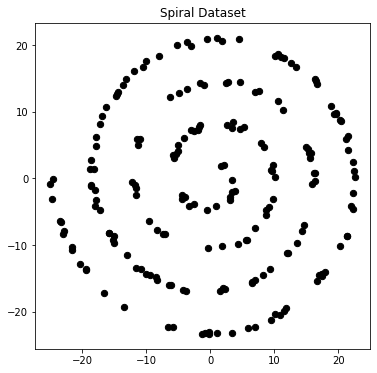

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(6,6))
# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
np.random.seed(8888)

# spiral dataset
n = np.sqrt(np.random.rand(200,1)) * 1440 * (2*np.pi)/360
d1x = -np.cos(n)*n + np.random.rand(200,1) * 0.8
d1y = np.sin(n)*n + np.random.rand(200,1) * 0.8

plt.scatter(d1x, d1y, c = 'black', s=40)
plt.title('Spiral Dataset')
X = np.hstack((d1x,d1y));

## The kNN Graph

In [9]:
# compute pairwise distance matrix to find k nearest neighbors for each x_i in X
from sklearn.metrics import pairwise_distances
dist_matrix = pairwise_distances(X)
dist_matrix.shape

# function that outputs N x k matrix with k nearest neighbors for each observation in X
def nearest_neighbors(X, k):
    # we use k+1 here since Xi will have the shortest distance to itself
    knn_matrix = np.zeros((len(X), k))
    # compute pairwise distances
    dist_matrix = pairwise_distances(X)
    # for each row find indices of k nearest neighbors
    for i in range(len(X)):
        knn_matrix[i] = dist_matrix[i,:].argsort()[1:k+1]
    return knn_matrix

(200, 200)

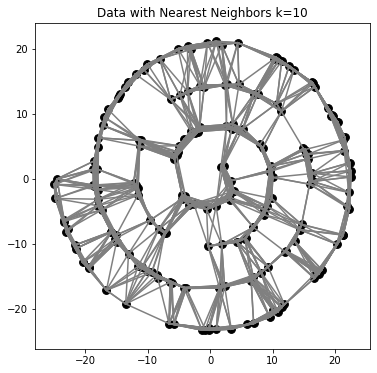

In [13]:
# set number of neighbors and find neighborhood matrix
k = 10
X_neighbors = nearest_neighbors(X, k)

# loop through each data point and draw lines to nearest neighbors
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], alpha=0.3, c='black', s=50);

for i in range(len(X)):
    neighbors = X_neighbors[i]
    for j in range(len(neighbors)):
        plt.plot(X[[i, neighbors.astype('int')[j]], 0], X[[i, neighbors.astype('int')[j]], 1], c='gray')

plt.title('Data with Nearest Neighbors k=' + str(k))
plt.scatter(X[:,0], X[:,1], c='black', s=60);

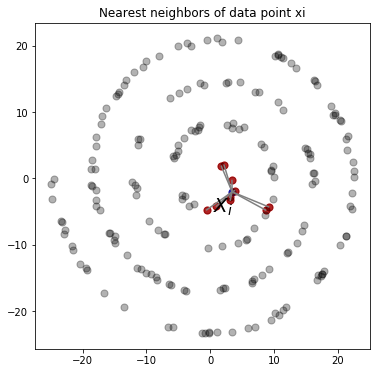

In [32]:
# neighbors for a given xi (first element in X)
pos = 3
neighbors = X_neighbors[pos] # indices of neighbors
plt.figure(figsize=(6,6))
plt.scatter(X[pos, 0], X[pos, 1], c='blue', s=50, alpha=0.8)
plt.text(X[pos, 0]-3, X[pos, 1] - 3, s='$X_i$', size=20)
plt.scatter(X[neighbors.astype('int'), 0], X[neighbors.astype('int'), 1], c='red', alpha = 0.8, s=50)
for i in range(len(neighbors)):
    plt.plot(X[[pos, neighbors.astype('int')[i]], 0], X[[pos, neighbors.astype('int')[i]], 1], c='gray')
plt.scatter(X[:,0], X[:,1], alpha=0.3, c='black', s=50)
plt.title('Nearest neighbors of data point xi');

In [42]:
# get coordinates for the neighborhood of xi
xi_nn = []
for i in range(len(neighbors)):
    xi_nn.append(X[neighbors.astype('int')[i]])
xi_nn = np.array(xi_nn)

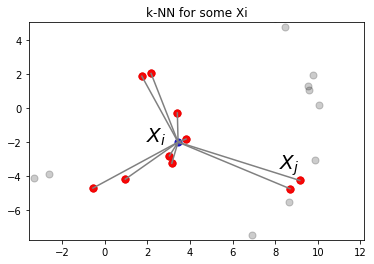

In [53]:
# zoom in on xi with nearest neighbor edges
j = k-1
plt.scatter(X[pos, 0], X[pos, 1], c='blue', s=50, alpha=0.8)
plt.text(X[pos, 0] - 1.5, X[pos, 1], s='$X_i$', size=20)
plt.text(xi_nn[j][0]-1.0, xi_nn[j][1] + 0.7, s='$X_j$', size=20)
plt.scatter(X[neighbors.astype('int'), 0], X[neighbors.astype('int'), 1], c='red', alpha = 0.8, s=50)
for i in range(len(neighbors)):
    plt.plot(X[[pos, neighbors.astype('int')[i]], 0], X[[pos, neighbors.astype('int')[i]], 1], c='gray')
plt.scatter(X[:,0], X[:,1], alpha=0.2, c='black', s=50);
plt.scatter(X[neighbors.astype('int'), 0], X[neighbors.astype('int'), 1], c='red', alpha = 0.8, s=50)
plt.title('k-NN for some Xi')
plt.xlim(np.min(xi_nn[:,0])-3,np.max(xi_nn[:,0])+3)
plt.ylim(np.min(xi_nn[:,1]-3),np.max(xi_nn[:,1])+3);